In [1]:
%pylab inline
import scipy.optimize as opt
from mpl_toolkits import mplot3d

Populating the interactive namespace from numpy and matplotlib


### example: linear function, with two parameters a and b

2.0501493379442888 4.701093667392744 40.5339617529079


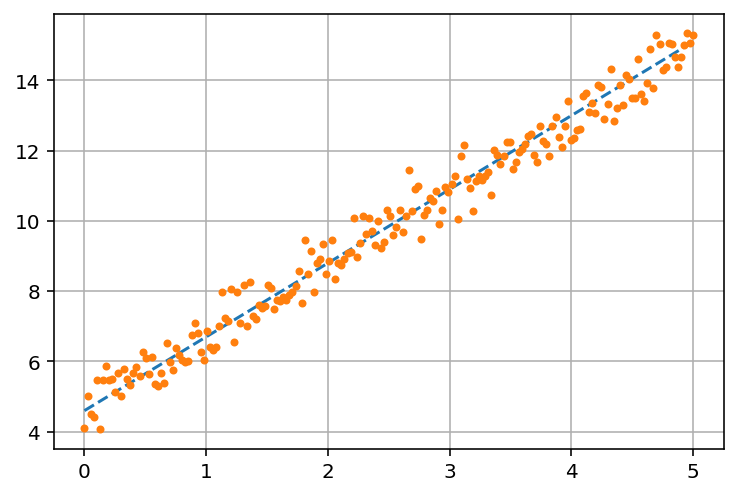

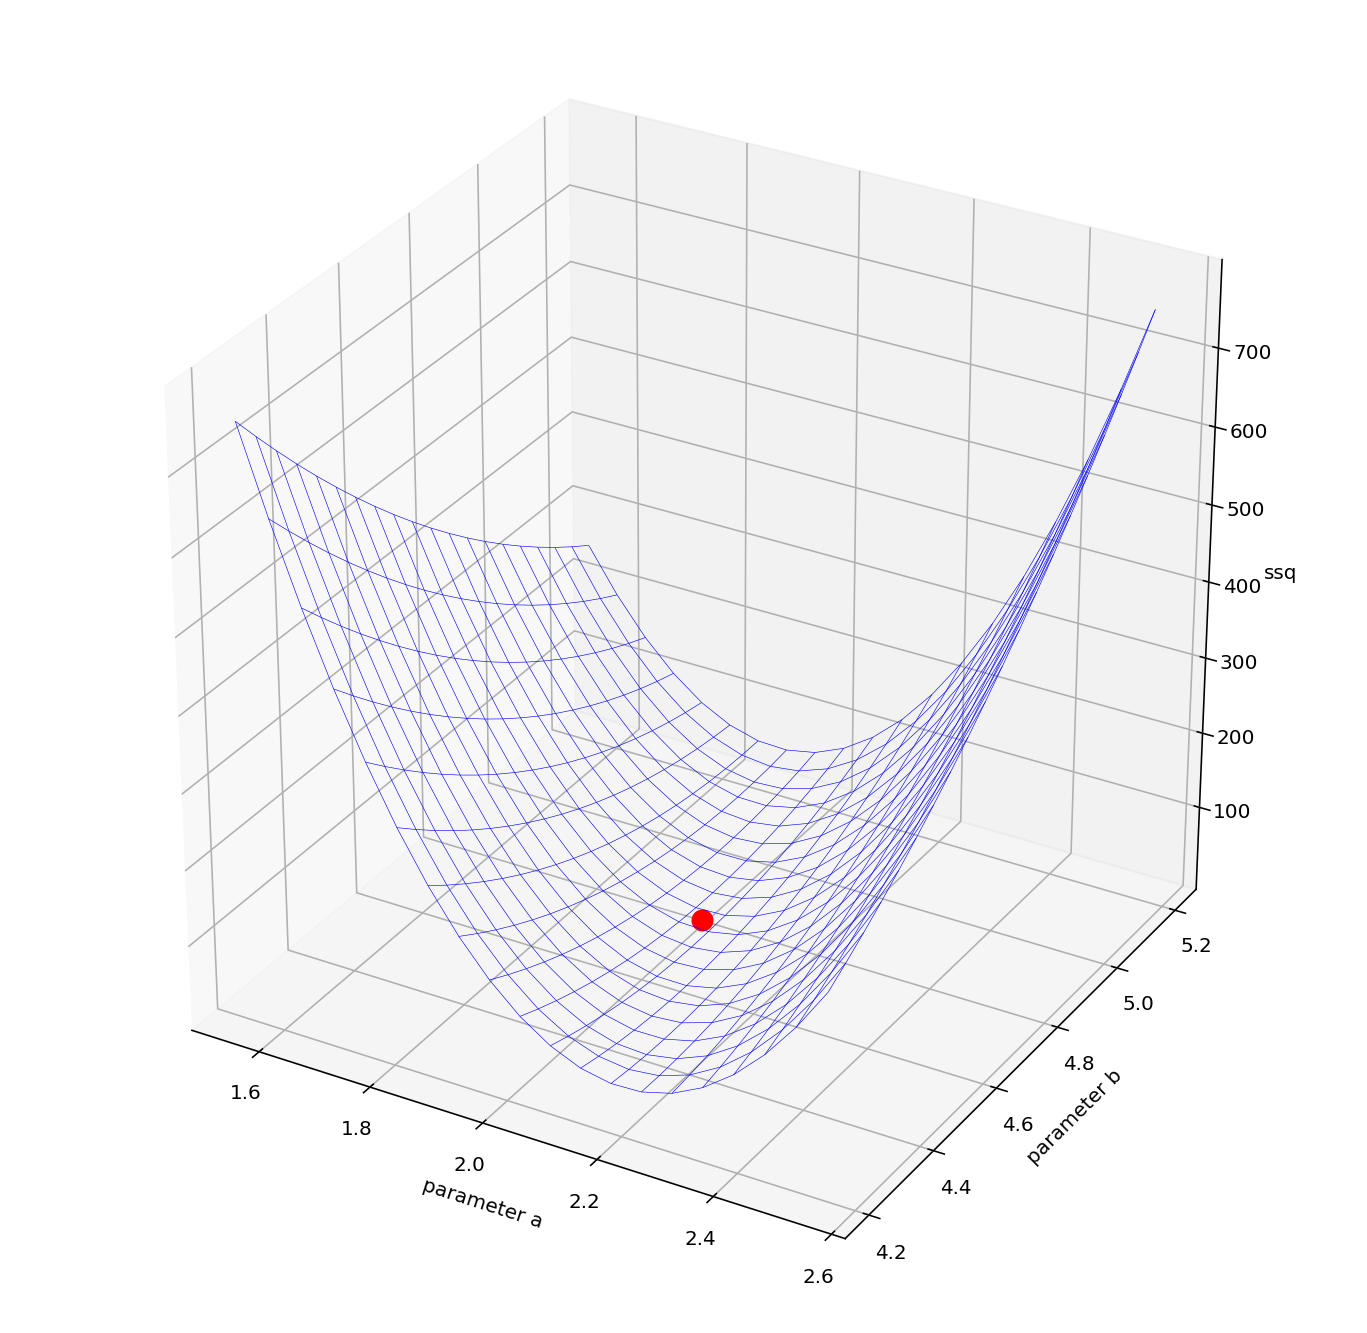

In [2]:
def func(x, a,b):
    return a*x + b

def err(par):
    return func(x, *par) - y

def ssq(a,b):
    return np.sum(err([a,b])**2)

a, b = 2.1, 4.6
x = np.linspace(0, 5, 200)
y = func(x, a,b)
plt.plot(x, y, '--')
y += np.random.normal(0, 0.5, size=len(y))
plt.plot(x, y, '.')
plt.grid();

optimal, _ = opt.leastsq(err, [2, 4])
a_opt, b_opt = optimal
z_opt = ssq(a_opt, b_opt)
print (a_opt, b_opt, z_opt)

a_ax = np.linspace(a_opt - 0.5, a_opt + 0.5, 20)
b_ax = np.linspace(b_opt - 0.5, b_opt + 0.5, 20)

Z = np.array([np.array([ssq(a,b) for a in a_ax]) for b in b_ax])
Z.shape

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d');

A, B = np.meshgrid(a_ax, b_ax)
#ax.plot_surface(A, B, Z, color='lightblue', alpha=0.7);
ax.plot_wireframe(A, B, Z, color='blue', lw=0.3);
ax.scatter3D(a_opt, b_opt, z_opt, color='red', s=100);
ax.set_xlabel('parameter a')
ax.set_ylabel('parameter b')
ax.set_zlabel('ssq');



#### linear combination of two functions p(x) and q(x)

In [0]:
def func(x, a,b):
    def p(x):
        return np.sin(2*np.pi/3.0*x)
    def q(x):
        return np.exp(-2.4*x*x)
    return a*p(x) + b*q(x)

def err(par):
    return func(x, *par) - y

def ssq(a,b):
    return np.sum(err([a,b])**2)

a, b = 3.2, 7.8
x = np.linspace(0, 5, 100)
y = func(x, a,b)
plt.plot(x, y, '--')
y += np.random.normal(0, 0.5, size=len(y))
plt.plot(x, y, '.')

plt.grid();

optimal = opt.least_squares(err, [-3, 8])
a_opt, b_opt = optimal.x
z_opt = ssq(*optimal.x)
print (a_opt, b_opt, z_opt)

a_ax = np.linspace(a-2, a+2, 20)
b_ax = np.linspace(b-5, b+5 , 20)

Z = np.array([np.array([ssq(a,b) for a in a_ax]) for b in b_ax])
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d');

A, B = np.meshgrid(a_ax, b_ax)
ax.plot_surface(A, B, Z, color='lightblue', alpha=0.3);
ax.plot_wireframe(A, B, Z, color='blue', lw=0.3);
ax.scatter3D(a_opt, b_opt, z_opt, color='red', s=50)
ax.set_xlabel('parameter a')
ax.set_ylabel('parameter b')
ax.set_zlabel('ssq');
